<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_4_4_Classification_and_k_Nearest_Neighbors_%5BSOLUTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealong - k-Nearest Neighbors with MNIST

In this Codealong, we'll be learning how to use KNN with sklearn, just like we did with multiple linear regression!

## 0. Setup

First, make sure to run the following setup code to get the necessary imports.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load the Dataset

Run the following code to load in the MNIST data set! Note that we don't have to seperate it into train and test ourselves because the csv's are already seperated (although we will have split test into val and test ourselves). Load it using `pd.read_csv` and immediately cast it to a numpy array `.to_numpy()`.

Also note that we're only taking the first 2000 rows of train and 500 rows of test. This is so that the analysis we run doesn't take an extraordinary long amount of time :)

In [ ]:
data_train = pd.read_csv("sample_data/mnist_train_small.csv")
display(data_train)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train = data_train.to_numpy()
data_train = data_train[:2000, :]
display(data_train)

data_test = pd.read_csv("sample_data/mnist_test.csv")
data_test = data_test.to_numpy()
data_test = data_test[:500, :]
display(data_test)

np.random.seed(19)
np.random.shuffle(data_test)

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

You'll also notice that the column names for this dataset look very strange. Unfortunately, this is out of our control. Just know that the left-most column is the label (what digit the data point is) and all the other columns are together the feature vector for each pixel.

Now, test your skills by doing some work to clean up this data!
*   Seperate out `X_train` and `y_train` by indexing into `data_train`.
*   Split `data_test` into `data_val` and `data_test` with [`np.split()`](https://numpy.org/devdocs/reference/generated/numpy.split.html)
*   Seperate each of *those* into `X_val`, `y_val`, `X_test`, `y_test`.

In [ ]:
# TODO: Split into val and test
def val_test_split(dataset):
  split_index = dataset.shape[0] // 2
  return np.split(dataset, [split_index])

data_val, data_test = val_test_split(data_test)

In [ ]:
# TODO: Split into X_train, y_train, X_val, y_val, X_test, and y_test
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_val = data_val[:, 1:]
y_val = data_val[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

## 2. Visualize some examples

Run the following code to plot the first image in `X_train`.

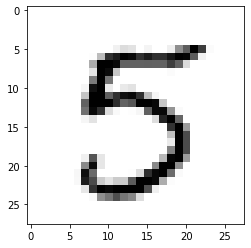

In [ ]:
row = X_train[0].reshape((28, 28))
plt.imshow(row, cmap="Greys")

You should see a five!

Now, test your skills by writing code to print the *third* image in `X_train`!

Index into `X_train` to get a single row, reshape into the original 28 * 28 image, and then plot it using `plt.imshow()` (read a guide on plotting images with matplotlib [here](https://matplotlib.org/tutorials/introductory/images.html)).

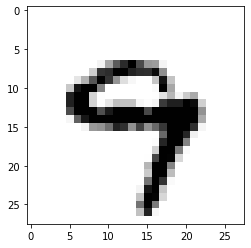

In [ ]:
# TODO: Plot the image from the third row
row = X_train[2].reshape((28, 28))
plt.imshow(row, cmap="Greys")

You should see a 9!

## 3. Calculate some statistics in the data

Now, we're going to calculate some quick summary statistics about the data!

To start, write code to print the labels of the first 20 images.

In [ ]:
# TODO: Print the first 20 labels
print(y_train[:20])

[5 7 9 5 2 0 6 5 5 2 7 7 6 8 9 3 5 7 6 9]


Then, write code to get the count of each label (i.e. how many of each digit are in our train dataset).

*Hint: Create a temporary DataFrame version of the `y_train` array and use `.groupby()`.*

In [ ]:
# TODO: Get the count of each label
y_train_df = pd.DataFrame(y_train, columns=["label"])
display(y_train_df.groupby(["label"]).size())

label
0    177
1    222
2    215
3    186
4    193
5    180
6    196
7    217
8    197
9    217
dtype: int64

## 4. "Train" our model

Now, let's create a k-Nearest Neighbors ML model and use it on our data!

First, import `sklearn.neighbors` and then call that module's `sklearn.neighbors.KNeighborsClassifier()` to create a new knn model.

Then, fit the model to our train set.

In [ ]:
# TODO: Create and fit our knn model
import sklearn.neighbors

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 5. Make a prediction and evaluate performance

Finally, let's make a prediction and evaluate performance!

To start, import `sklearn.metrics`. Then, call the model's `.predict()` function and generate a `y_hat`. Finally, using `sklearn.metrics` get the `accuracy_score` and report it.

In [ ]:
# TODO: Make a prediction and gauge the accuracy!
import sklearn.metrics

y_hat = knn.predict(X_val)
sklearn.metrics.accuracy_score(y_val, y_hat)

0.872

You'll notice that this accuracy score is *really* good! If we randomly guessed we'd have an accuracy of 10%, so 87.2% is a lot better!

# Codealong - F1 Score and Confusion Matrices

In this Codealong, we're going to be exploring ways to measure the effectiveness of our KNN model!

## 1. Visualize a confusion matrix for k=1 on the test set

To start, call `sklearn.metrics.confusion.matrix()` with our prediction and the true values, and visualize the result as a heatmap.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


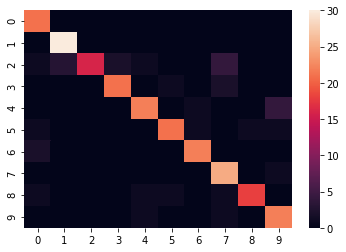

In [ ]:
# TODO: Generate a confusion matrix
import seaborn as sns

confusion_matrix = sklearn.metrics.confusion_matrix(y_val, y_hat)
sns.heatmap(confusion_matrix)
plt.show()

## 2. Report the training and val F1-score for various values of k

Let's start by getting a single F1-score. We do this by calling `sklearn.metrics.f1_score()`, making sure to pass in the parameter `average="macro"`.

In [ ]:
sklearn.metrics.f1_score(y_val, y_hat, average='macro')

0.869328180802658

Now, compute the F1-scores for various values of k (specifically, 1 to 10).

*Hint: Do this with a for loop, creating a new knn model everytime, and appending the F1-scores to lists.*

In [ ]:
# TODO: Report the training and val F1-scores for various values of k
val_f1_scores = []
train_f1_scores = []
ks = range(1, 11)
for k in ks: # 1 to 10
  print("Fitting with {} nearest neighbors".format(k))
  knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  y_hat_val = knn.predict(X_val)
  val_f1 = sklearn.metrics.f1_score(y_val, y_hat_val, average='macro')
  val_f1_scores.append(val_f1)

  y_hat_train = knn.predict(X_train)
  train_f1 = sklearn.metrics.f1_score(y_train, y_hat_train, average='macro')
  train_f1_scores.append(train_f1)
  

print(val_f1_scores)
print(train_f1_scores)

Fitting with 1 nearest neighbors
Fitting with 2 nearest neighbors
Fitting with 3 nearest neighbors
Fitting with 4 nearest neighbors
Fitting with 5 nearest neighbors
Fitting with 6 nearest neighbors
Fitting with 7 nearest neighbors
Fitting with 8 nearest neighbors
Fitting with 9 nearest neighbors
Fitting with 10 nearest neighbors
[0.8540328142671869, 0.849905656155404, 0.8548707283113537, 0.8752284174955746, 0.869328180802658, 0.8574925598279833, 0.8568473321914256, 0.8412171681526797, 0.847603759198271, 0.8438166990450252]
[1.0, 0.9517596046434225, 0.9525620428332193, 0.9453627024089902, 0.9421973599748672, 0.9365896728964991, 0.9287202462436902, 0.9252223085772615, 0.9168474682624927, 0.9116417083452676]


## 3. Make a plot with the y-axis being F1-score and the x-axis being k

Make a plot with the y-axis being F1-score and the x-axis being k; include two “lines” - one for train and one for val, with a legend.

You can plot multiple lines on one plot simply by calling `plt.plot()` multiple times (before you call `plt.show()`). You can give these different lines labels by passing in a string with the `label` parameter when you plot them. You can give your plot a legend simply by calling `plt.legend()`.

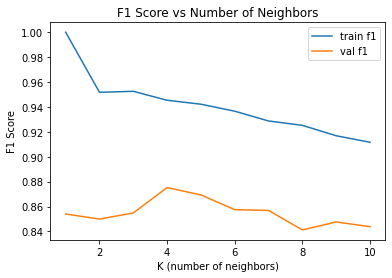

In [ ]:
# TODO: Make the plot!
plt.plot(ks, train_f1_scores, label='train f1')
plt.plot(ks, val_f1_scores, label='val f1')
plt.legend()
plt.xlabel("K (number of neighbors)")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Neighbors")
plt.show()

## 4. Choose the best k.

Based on your graph, which k seems to yield the best val F1-score?

## 5. Evaluate once on the test set with the best k.

Create one last knn model, passing in the ideal k value you found. Evaluate it on the test set.

In [ ]:
# TODO: Make one last knn model and evaluate it on the test set
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_hat_test = knn.predict(X_test)
test_f1 = sklearn.metrics.f1_score(y_test, y_hat_test, average='macro')
print(test_f1)

0.8809949975545053


Note that this is the ONLY time we're using the test set!